In [0]:
import keras
import numpy as NP
from keras.datasets import mnist


In [0]:
(X_TRAIN,Y_TRAIN),(X_TEST,Y_TEST) = mnist.load_data()

In [12]:
X_TRAIN.shape,X_TEST.shape

((60000, 28, 28), (10000, 28, 28))

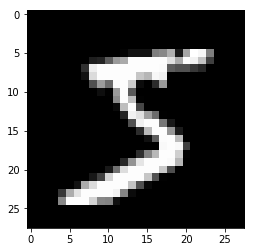

In [13]:
import matplotlib.pyplot as plt
plt.imshow(X_TRAIN[0],'gray')

In [0]:
X_TRAIN = NP.reshape(X_TRAIN,(60000,784))
X_TEST = NP.reshape(X_TEST,(10000,784))

In [15]:
X_TRAIN.shape,X_TEST.shape

((60000, 784), (10000, 784))

In [0]:
X_TRAIN = X_TRAIN/255
X_TEST = X_TEST/255

In [0]:
Y_TEST = keras.utils.to_categorical(Y_TEST,num_classes=10,dtype='int32')
Y_TRAIN = keras.utils.to_categorical(Y_TRAIN,num_classes=10,dtype='int32')

In [0]:
Y_TEST[0]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int32)

# 2 Hidden Layer MLP having no Dropout and Batch Normalization

# Neuron in Hidden Layers = [200-100]

In [0]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.initializers import he_normal


In [0]:
MODEL = Sequential()
MODEL.add(Dense(200,activation='relu',input_shape=(X_TRAIN.shape[1],),kernel_initializer=he_normal(seed=None)))
MODEL.add(Dense(100,activation='relu',kernel_initializer=he_normal(seed=None)))
MODEL.add(Dense(10,activation='softmax'))

In [0]:
MODEL.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_105 (Dense)            (None, 200)               157000    
_________________________________________________________________
dense_106 (Dense)            (None, 100)               20100     
_________________________________________________________________
dense_107 (Dense)            (None, 10)                1010      
Total params: 178,110
Trainable params: 178,110
Non-trainable params: 0
_________________________________________________________________


In [0]:
MODEL.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
FINAL_MODEL = MODEL.fit(X_TRAIN,Y_TRAIN,batch_size=128,epochs=30,verbose=1,validation_data=(X_TEST,Y_TEST))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 8s 139us/step - loss: 0.2852 - acc: 0.9175 - val_loss: 0.1412 - val_acc: 0.9572
Epoch 2/30
60000/60000 [==============================] - 4s 61us/step - loss: 0.1084 - acc: 0.9683 - val_loss: 0.0978 - val_acc: 0.9697
Epoch 3/30
60000/60000 [==============================] - 4s 61us/step - loss: 0.0726 - acc: 0.9778 - val_loss: 0.0760 - val_acc: 0.9765
Epoch 4/30
60000/60000 [==============================] - 4s 62us/step - loss: 0.0563 - acc: 0.9829 - val_loss: 0.0778 - val_acc: 0.9763
Epoch 5/30
60000/60000 [==============================] - 4s 62us/step - loss: 0.0413 - acc: 0.9871 - val_loss: 0.0758 - val_acc: 0.9761
Epoch 6/30
60000/60000 [==============================] - 4s 62us/step - loss: 0.0326 - acc: 0.9897 - val_loss: 0.0732 - val_acc: 0.9767
Epoch 7/30
60000/60000 [==============================] - 4s 61us/step - loss: 0.0258 - acc: 0.9919 - val_loss: 0.0758 - val_ac

In [0]:
print(FINAL_MODEL.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [0]:
TRAIN_LOSS = FINAL_MODEL.history['loss']
VAL_LOSS = FINAL_MODEL.history['val_loss']
X = list(range(1,31))

In [0]:
TEST_ACCURACY = []
score = MODEL.evaluate(X_TEST, Y_TEST, verbose=0) 
TEST_ACCURACY.append(score[1])
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.09554963889349678
Test accuracy: 0.982


Text(0, 0.5, 'Cross Entropy Loss')

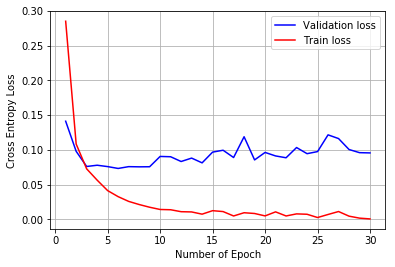

In [0]:
plt.plot(X,VAL_LOSS,'b',label="Validation loss")
plt.plot(X,TRAIN_LOSS,'r',label='Train loss')
plt.legend()
plt.grid()
plt.xlabel("Number of Epoch")
plt.ylabel('Cross Entropy Loss')



In [0]:
MODEL_WT = MODEL.get_weights()
for i in range(0,len(MODEL_WT)):
    print(MODEL_WT[i].shape)

(784, 200)
(200,)
(200, 100)
(100,)
(100, 10)
(10,)


Text(0.5, 0, 'OUTPUT_WT ')

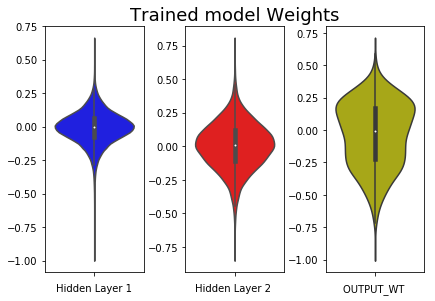

In [0]:

import seaborn as SNS
H1_WT = MODEL_WT[0].flatten().reshape(-1,1)
H2_WT = MODEL_WT[2].flatten().reshape(-1,1)
OUT_WT= MODEL_WT[4].flatten().reshape(-1,1)


fig,(axes1,axes2,axes3) = plt.subplots(nrows=1, ncols=3)
fig.tight_layout()

plt.subplot(1, 3, 1)
VIOLIN = SNS.violinplot(y=H1_WT,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights",size=18)
VIOLIN = SNS.violinplot(y=H2_WT, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
VIOLIN = SNS.violinplot(y=OUT_WT, color='y')
plt.xlabel('OUTPUT_WT ')

# 2 Hidden Layer MLP + Batch Normalization

# Neuron in Hidden Layers = [200-100]

In [0]:
from keras.layers.normalization import BatchNormalization
MODEL = Sequential()
MODEL.add(Dense(200,activation='relu',input_shape=(X_TRAIN.shape[1],),kernel_initializer=he_normal(seed=None)))
MODEL.add(BatchNormalization())
MODEL.add(Dense(100,activation='relu',kernel_initializer=he_normal(seed=None)))
MODEL.add(BatchNormalization())
MODEL.add(Dense(10,activation='softmax'))
print(MODEL.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_108 (Dense)            (None, 200)               157000    
_________________________________________________________________
batch_normalization_44 (Batc (None, 200)               800       
_________________________________________________________________
dense_109 (Dense)            (None, 100)               20100     
_________________________________________________________________
batch_normalization_45 (Batc (None, 100)               400       
_________________________________________________________________
dense_110 (Dense)            (None, 10)                1010      
Total params: 179,310
Trainable params: 178,710
Non-trainable params: 600
_________________________________________________________________
None


In [0]:
MODEL.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
FINAL_MODEL = MODEL.fit(X_TRAIN,Y_TRAIN,batch_size=128,epochs=30,verbose=1,validation_data=(X_TEST,Y_TEST))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 9s 155us/step - loss: 0.2312 - acc: 0.9321 - val_loss: 0.1161 - val_acc: 0.9632
Epoch 2/30
60000/60000 [==============================] - 5s 80us/step - loss: 0.0873 - acc: 0.9742 - val_loss: 0.0863 - val_acc: 0.9731
Epoch 3/30
60000/60000 [==============================] - 5s 81us/step - loss: 0.0582 - acc: 0.9821 - val_loss: 0.0835 - val_acc: 0.9754
Epoch 4/30
60000/60000 [==============================] - 5s 79us/step - loss: 0.0440 - acc: 0.9862 - val_loss: 0.0796 - val_acc: 0.9752
Epoch 5/30
60000/60000 [==============================] - 5s 79us/step - loss: 0.0339 - acc: 0.9890 - val_loss: 0.0778 - val_acc: 0.9783
Epoch 6/30
60000/60000 [==============================] - 5s 79us/step - loss: 0.0247 - acc: 0.9922 - val_loss: 0.0787 - val_acc: 0.9752
Epoch 7/30
60000/60000 [==============================] - 5s 80us/step - loss: 0.0190 - acc: 0.9941 - val_loss: 0.0781 - val_ac

In [0]:

score = MODEL.evaluate(X_TEST, Y_TEST, verbose=0) 
TEST_ACCURACY.append(score[1])
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.09618185498487473
Test accuracy: 0.9791


Text(0, 0.5, 'Cross Entropy Loss')

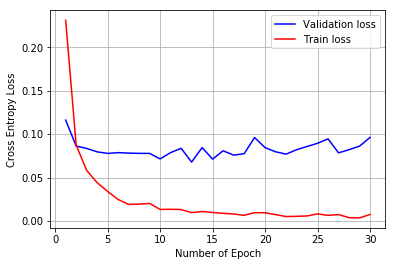

In [0]:
TRAIN_LOSS = FINAL_MODEL.history['loss']
VAL_LOSS = FINAL_MODEL.history['val_loss']
X = list(range(1,31))
plt.plot(X,VAL_LOSS,'b',label="Validation loss")
plt.plot(X,TRAIN_LOSS,'r',label='Train loss')
plt.legend()
plt.grid()
plt.xlabel("Number of Epoch")
plt.ylabel('Cross Entropy Loss')



In [0]:
MODEL_WT = MODEL.get_weights()
for i in range(0,len(MODEL_WT)):
    print(MODEL_WT[i].shape)

(784, 200)
(200,)
(200,)
(200,)
(200,)
(200,)
(200, 100)
(100,)
(100,)
(100,)
(100,)
(100,)
(100, 10)
(10,)


Text(0.5, 0, 'OUTPUT_WT ')

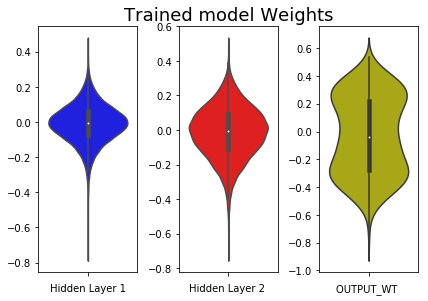

In [0]:

import seaborn as SNS
H1_WT = MODEL_WT[0].flatten().reshape(-1,1)
H2_WT = MODEL_WT[6].flatten().reshape(-1,1)
OUT_WT= MODEL_WT[12].flatten().reshape(-1,1)


fig,(axes1,axes2,axes3) = plt.subplots(nrows=1, ncols=3)
fig.tight_layout()

plt.subplot(1, 3, 1)
VIOLIN = SNS.violinplot(y=H1_WT,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights",size=18)
VIOLIN = SNS.violinplot(y=H2_WT, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
VIOLIN = SNS.violinplot(y=OUT_WT, color='y')
plt.xlabel('OUTPUT_WT ')

# 2 Hidden Layer MLP + Dropout + Batch Normalization

# Neuron in Hidden Layers = [200-100]

In [0]:
from keras.layers import Dropout

MODEL = Sequential()
MODEL.add(Dense(200,activation='relu',input_shape=(X_TRAIN.shape[1],),kernel_initializer=he_normal(seed=None)))
MODEL.add(BatchNormalization())
MODEL.add(Dropout(0.5))
MODEL.add(Dense(100,activation='relu',kernel_initializer=he_normal(seed=None)))
MODEL.add(BatchNormalization())
MODEL.add(Dropout(0.5))
MODEL.add(Dense(10,activation='softmax'))
print(MODEL.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_111 (Dense)            (None, 200)               157000    
_________________________________________________________________
batch_normalization_46 (Batc (None, 200)               800       
_________________________________________________________________
dropout_32 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_112 (Dense)            (None, 100)               20100     
_________________________________________________________________
batch_normalization_47 (Batc (None, 100)               400       
_________________________________________________________________
dropout_33 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_113 (Dense)            (None, 10)                1010      
Total para

In [0]:
MODEL.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
FINAL_MODEL = MODEL.fit(X_TRAIN,Y_TRAIN,batch_size=128,epochs=30,verbose=1,validation_data=(X_TEST,Y_TEST))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 10s 174us/step - loss: 0.6045 - acc: 0.8177 - val_loss: 0.1930 - val_acc: 0.9402
Epoch 2/30
60000/60000 [==============================] - 6s 97us/step - loss: 0.2957 - acc: 0.9125 - val_loss: 0.1492 - val_acc: 0.9525
Epoch 3/30
60000/60000 [==============================] - 6s 95us/step - loss: 0.2302 - acc: 0.9322 - val_loss: 0.1180 - val_acc: 0.9647
Epoch 4/30
60000/60000 [==============================] - 6s 94us/step - loss: 0.1973 - acc: 0.9419 - val_loss: 0.1049 - val_acc: 0.9673
Epoch 5/30
60000/60000 [==============================] - 6s 94us/step - loss: 0.1739 - acc: 0.9481 - val_loss: 0.0939 - val_acc: 0.9723
Epoch 6/30
60000/60000 [==============================] - 6s 96us/step - loss: 0.1608 - acc: 0.9519 - val_loss: 0.0924 - val_acc: 0.9732
Epoch 7/30
60000/60000 [==============================] - 6s 96us/step - loss: 0.1507 - acc: 0.9545 - val_loss: 0.0887 - val_a

In [0]:

score = MODEL.evaluate(X_TEST, Y_TEST, verbose=0) 
TEST_ACCURACY.append(score[1])
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.06590885129593661
Test accuracy: 0.9814


Text(0, 0.5, 'Cross Entropy Loss')

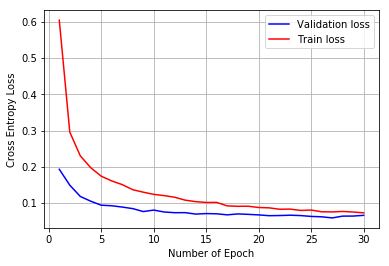

In [0]:
TRAIN_LOSS = FINAL_MODEL.history['loss']
VAL_LOSS = FINAL_MODEL.history['val_loss']
X = list(range(1,31))
plt.plot(X,VAL_LOSS,'b',label="Validation loss")
plt.plot(X,TRAIN_LOSS,'r',label='Train loss')
plt.legend()
plt.grid()
plt.xlabel("Number of Epoch")
plt.ylabel('Cross Entropy Loss')



In [0]:
MODEL_WT = MODEL.get_weights()
for i in range(0,len(MODEL_WT)):
    print(MODEL_WT[i].shape)

(784, 200)
(200,)
(200,)
(200,)
(200,)
(200,)
(200, 100)
(100,)
(100,)
(100,)
(100,)
(100,)
(100, 10)
(10,)


Text(0.5, 0, 'OUTPUT_WT ')

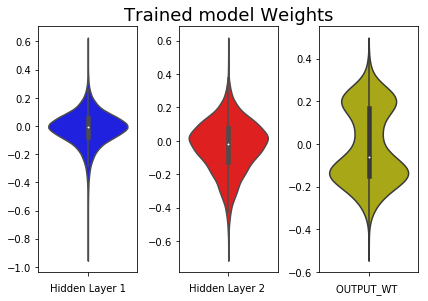

In [0]:

import seaborn as SNS

H1_WT = MODEL_WT[0].flatten().reshape(-1,1)
H2_WT = MODEL_WT[6].flatten().reshape(-1,1)
OUT_WT= MODEL_WT[12].flatten().reshape(-1,1)


fig,(axes1,axes2,axes3) = plt.subplots(nrows=1, ncols=3)
fig.tight_layout()

plt.subplot(1, 3, 1)
VIOLIN = SNS.violinplot(y=H1_WT,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights",size=18)
VIOLIN = SNS.violinplot(y=H2_WT, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
VIOLIN = SNS.violinplot(y=OUT_WT, color='y')
plt.xlabel('OUTPUT_WT ')

# 3 Hidden Layer MLP having no Dropout and Batch Normalization

# Neuron in Hidden Layers = [200-100-50]

In [0]:
MODEL = Sequential()
MODEL.add(Dense(200,activation='relu',input_shape=(X_TRAIN.shape[1],),kernel_initializer=he_normal(seed=None)))
MODEL.add(Dense(100,activation='relu',kernel_initializer=he_normal(seed=None)))
MODEL.add(Dense(50,activation='relu',kernel_initializer=he_normal(seed=None)))
MODEL.add(Dense(10,activation='softmax'))
MODEL.summary()
MODEL.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
FINAL_MODEL = MODEL.fit(X_TRAIN,Y_TRAIN,batch_size=128,epochs=30,verbose=1,validation_data=(X_TEST,Y_TEST))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_114 (Dense)            (None, 200)               157000    
_________________________________________________________________
dense_115 (Dense)            (None, 100)               20100     
_________________________________________________________________
dense_116 (Dense)            (None, 50)                5050      
_________________________________________________________________
dense_117 (Dense)            (None, 10)                510       
Total params: 182,660
Trainable params: 182,660
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 9s 148us/step - loss: 0.2869 - acc: 0.9170 - val_loss: 0.1396 - val_acc: 0.9596
Epoch 2/30
60000/60000 [==============================] - 4s 72us/step - loss: 0

In [0]:

score = MODEL.evaluate(X_TEST, Y_TEST, verbose=0) 
TEST_ACCURACY.append(score[1])
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.09314377224932355
Test accuracy: 0.9822


Text(0, 0.5, 'Cross Entropy Loss')

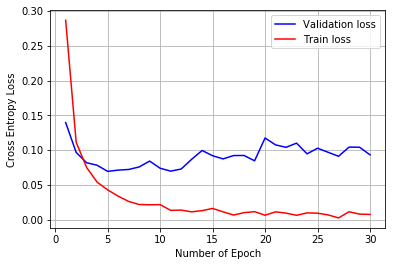

In [0]:
TRAIN_LOSS = FINAL_MODEL.history['loss']
VAL_LOSS = FINAL_MODEL.history['val_loss']
X = list(range(1,31))
plt.plot(X,VAL_LOSS,'b',label="Validation loss")
plt.plot(X,TRAIN_LOSS,'r',label='Train loss')
plt.legend()
plt.grid()
plt.xlabel("Number of Epoch")
plt.ylabel('Cross Entropy Loss')



In [0]:
MODEL_WT = MODEL.get_weights()
for i in range(0,len(MODEL_WT)):
    print(MODEL_WT[i].shape)

(784, 200)
(200,)
(200, 100)
(100,)
(100, 50)
(50,)
(50, 10)
(10,)


Text(0.5, 0, 'OUTPUT_WT ')

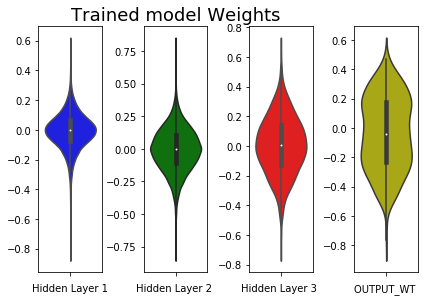

In [0]:

import seaborn as SNS
H1_WT = MODEL_WT[0].flatten().reshape(-1,1)
H2_WT = MODEL_WT[2].flatten().reshape(-1,1)
H3_WT = MODEL_WT[4].flatten().reshape(-1,1)
OUT_WT= MODEL_WT[6].flatten().reshape(-1,1)


fig,(axes1,axes2,axes3,axes4) = plt.subplots(nrows=1, ncols=4)
fig.tight_layout()

plt.subplot(1, 4, 1)
VIOLIN = SNS.violinplot(y=H1_WT,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights",size=18)
VIOLIN = SNS.violinplot(y=H2_WT, color='g')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
VIOLIN = SNS.violinplot(y=H3_WT, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
VIOLIN = SNS.violinplot(y=OUT_WT, color='y')
plt.xlabel('OUTPUT_WT ')

# 3 Hidden Layer MLP + Batch Normalization

# Neuron in Hidden Layers = [200-100-50]

In [0]:
MODEL = Sequential()
MODEL.add(Dense(200,activation='relu',input_shape=(X_TRAIN.shape[1],),kernel_initializer=he_normal(seed=None)))
MODEL.add(BatchNormalization())
MODEL.add(Dense(100,activation='relu',kernel_initializer=he_normal(seed=None)))
MODEL.add(BatchNormalization())
MODEL.add(Dense(50,activation='relu',kernel_initializer=he_normal(seed=None)))
MODEL.add(BatchNormalization())
MODEL.add(Dense(10,activation='softmax'))
MODEL.summary()
MODEL.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
FINAL_MODEL = MODEL.fit(X_TRAIN,Y_TRAIN,batch_size=128,epochs=30,verbose=1,validation_data=(X_TEST,Y_TEST))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_118 (Dense)            (None, 200)               157000    
_________________________________________________________________
batch_normalization_48 (Batc (None, 200)               800       
_________________________________________________________________
dense_119 (Dense)            (None, 100)               20100     
_________________________________________________________________
batch_normalization_49 (Batc (None, 100)               400       
_________________________________________________________________
dense_120 (Dense)            (None, 50)                5050      
_________________________________________________________________
batch_normalization_50 (Batc (None, 50)                200       
_________________________________________________________________
dense_121 (Dense)            (None, 10)                510       
Total para

In [0]:

score = MODEL.evaluate(X_TEST, Y_TEST, verbose=0) 
TEST_ACCURACY.append(score[1])
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.0854192057800221
Test accuracy: 0.9808


Text(0, 0.5, 'Cross Entropy Loss')

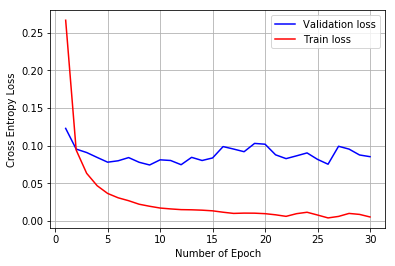

In [0]:
TRAIN_LOSS = FINAL_MODEL.history['loss']
VAL_LOSS = FINAL_MODEL.history['val_loss']
X = list(range(1,31))
plt.plot(X,VAL_LOSS,'b',label="Validation loss")
plt.plot(X,TRAIN_LOSS,'r',label='Train loss')
plt.legend()
plt.grid()
plt.xlabel("Number of Epoch")
plt.ylabel('Cross Entropy Loss')



In [0]:
MODEL_WT = MODEL.get_weights()
for i in range(0,len(MODEL_WT)):
    print(MODEL_WT[i].shape)

(784, 200)
(200,)
(200,)
(200,)
(200,)
(200,)
(200, 100)
(100,)
(100,)
(100,)
(100,)
(100,)
(100, 50)
(50,)
(50,)
(50,)
(50,)
(50,)
(50, 10)
(10,)


Text(0.5, 0, 'OUTPUT_WT ')

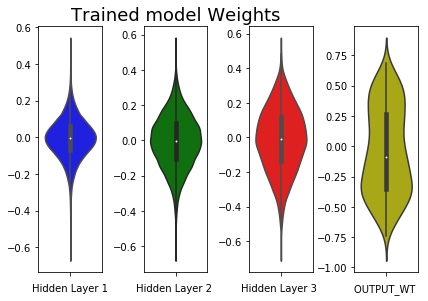

In [0]:

import seaborn as SNS

H1_WT = MODEL_WT[0].flatten().reshape(-1,1)
H2_WT = MODEL_WT[6].flatten().reshape(-1,1)
H3_WT = MODEL_WT[12].flatten().reshape(-1,1)
OUT_WT= MODEL_WT[18].flatten().reshape(-1,1)


fig,(axes1,axes2,axes3,axes4) = plt.subplots(nrows=1, ncols=4)
fig.tight_layout()

plt.subplot(1, 4, 1)
VIOLIN = SNS.violinplot(y=H1_WT,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights",size=18)
VIOLIN = SNS.violinplot(y=H2_WT, color='g')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
VIOLIN = SNS.violinplot(y=H3_WT, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
VIOLIN = SNS.violinplot(y=OUT_WT, color='y')
plt.xlabel('OUTPUT_WT ')

# 3 Hidden Layer MLP + Dropout + Batch Normalization

# Neuron in Hidden Layers = [200-100-50]

In [0]:


MODEL = Sequential()
MODEL.add(Dense(200,activation='relu',input_shape=(X_TRAIN.shape[1],),kernel_initializer=he_normal(seed=None)))
MODEL.add(BatchNormalization())
MODEL.add(Dropout(0.5))
MODEL.add(Dense(100,activation='relu',kernel_initializer=he_normal(seed=None)))
MODEL.add(BatchNormalization())
MODEL.add(Dropout(0.5))
MODEL.add(Dense(50,activation='relu',kernel_initializer=he_normal(seed=None)))
MODEL.add(BatchNormalization())
MODEL.add(Dropout(0.5))
MODEL.add(Dense(10,activation='softmax'))
print(MODEL.summary())

MODEL.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
FINAL_MODEL = MODEL.fit(X_TRAIN,Y_TRAIN,batch_size=128,epochs=30,verbose=1,validation_data=(X_TEST,Y_TEST))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_122 (Dense)            (None, 200)               157000    
_________________________________________________________________
batch_normalization_51 (Batc (None, 200)               800       
_________________________________________________________________
dropout_34 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_123 (Dense)            (None, 100)               20100     
_________________________________________________________________
batch_normalization_52 (Batc (None, 100)               400       
_________________________________________________________________
dropout_35 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_124 (Dense)            (None, 50)                5050      
__________

In [0]:

score = MODEL.evaluate(X_TEST, Y_TEST, verbose=0) 
TEST_ACCURACY.append(score[1])
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.07373714413648703
Test accuracy: 0.9811


Text(0, 0.5, 'Cross Entropy Loss')

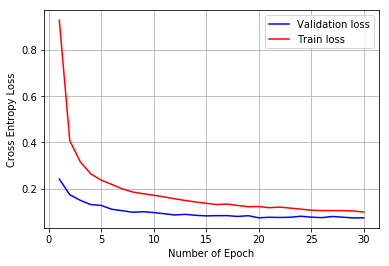

In [0]:
TRAIN_LOSS = FINAL_MODEL.history['loss']
VAL_LOSS = FINAL_MODEL.history['val_loss']
X = list(range(1,31))
plt.plot(X,VAL_LOSS,'b',label="Validation loss")
plt.plot(X,TRAIN_LOSS,'r',label='Train loss')
plt.legend()
plt.grid()
plt.xlabel("Number of Epoch")
plt.ylabel('Cross Entropy Loss')



In [0]:
MODEL_WT = MODEL.get_weights()
for i in range(0,len(MODEL_WT)):
    print(MODEL_WT[i].shape)

(784, 200)
(200,)
(200,)
(200,)
(200,)
(200,)
(200, 100)
(100,)
(100,)
(100,)
(100,)
(100,)
(100, 50)
(50,)
(50,)
(50,)
(50,)
(50,)
(50, 10)
(10,)


Text(0.5, 0, 'OUTPUT_WT ')

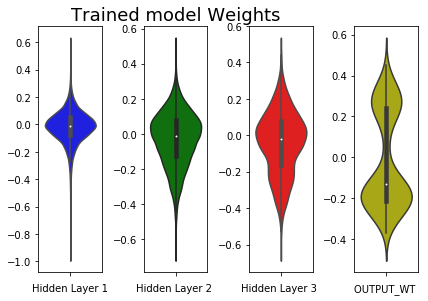

In [0]:

import seaborn as SNS

H1_WT = MODEL_WT[0].flatten().reshape(-1,1)
H2_WT = MODEL_WT[6].flatten().reshape(-1,1)
H3_WT = MODEL_WT[12].flatten().reshape(-1,1)
OUT_WT= MODEL_WT[18].flatten().reshape(-1,1)


fig,(axes1,axes2,axes3,axes4) = plt.subplots(nrows=1, ncols=4)
fig.tight_layout()

plt.subplot(1, 4, 1)
VIOLIN = SNS.violinplot(y=H1_WT,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights",size=18)
VIOLIN = SNS.violinplot(y=H2_WT, color='g')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
VIOLIN = SNS.violinplot(y=H3_WT, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
VIOLIN = SNS.violinplot(y=OUT_WT, color='y')
plt.xlabel('OUTPUT_WT ')

# 5 Hidden Layer MLP having no Dropout and Batch Normalization

# Neuron in Hidden Layers = [400-300-200-100-50]

In [0]:


MODEL = Sequential()
MODEL.add(Dense(400,activation='relu',input_shape=(X_TRAIN.shape[1],),kernel_initializer=he_normal(seed=None)))

MODEL.add(Dense(300,activation='relu',kernel_initializer=he_normal(seed=None)))

MODEL.add(Dense(200,activation='relu',kernel_initializer=he_normal(seed=None)))

MODEL.add(Dense(100,activation='relu',kernel_initializer=he_normal(seed=None)))

MODEL.add(Dense(10,activation='relu',kernel_initializer=he_normal(seed=None)))

MODEL.add(Dense(10,activation='softmax'))
print(MODEL.summary())

MODEL.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
FINAL_MODEL = MODEL.fit(X_TRAIN,Y_TRAIN,batch_size=128,epochs=30,verbose=1,validation_data=(X_TEST,Y_TEST))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_126 (Dense)            (None, 400)               314000    
_________________________________________________________________
dense_127 (Dense)            (None, 300)               120300    
_________________________________________________________________
dense_128 (Dense)            (None, 200)               60200     
_________________________________________________________________
dense_129 (Dense)            (None, 100)               20100     
_________________________________________________________________
dense_130 (Dense)            (None, 10)                1010      
_________________________________________________________________
dense_131 (Dense)            (None, 10)                110       
Total params: 515,720
Trainable params: 515,720
Non-trainable params: 0
_________________________________________________________________
None

In [0]:

score = MODEL.evaluate(X_TEST, Y_TEST, verbose=0) 
TEST_ACCURACY.append(score[1])
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.09456962197794405
Test accuracy: 0.9826


Text(0, 0.5, 'Cross Entropy Loss')

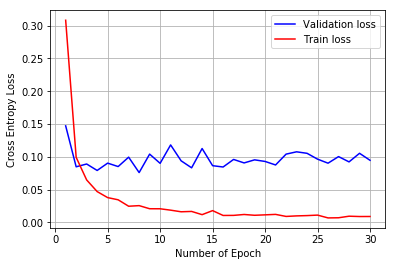

In [0]:
TRAIN_LOSS = FINAL_MODEL.history['loss']
VAL_LOSS = FINAL_MODEL.history['val_loss']
X = list(range(1,31))
plt.plot(X,VAL_LOSS,'b',label="Validation loss")
plt.plot(X,TRAIN_LOSS,'r',label='Train loss')
plt.legend()
plt.grid()
plt.xlabel("Number of Epoch")
plt.ylabel('Cross Entropy Loss')



In [0]:
MODEL_WT = MODEL.get_weights()
for i in range(0,len(MODEL_WT)):
    print(MODEL_WT[i].shape)

(784, 400)
(400,)
(400, 300)
(300,)
(300, 200)
(200,)
(200, 100)
(100,)
(100, 10)
(10,)
(10, 10)
(10,)


Text(0.5, 0, 'OUTPUT_WT ')

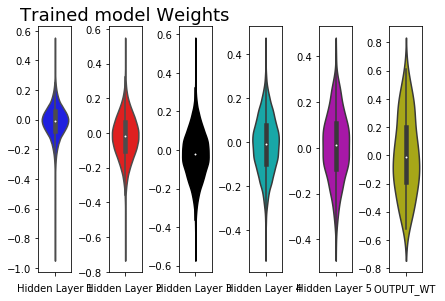

In [0]:


H1_WT = MODEL_WT[0].flatten().reshape(-1,1)
H2_WT = MODEL_WT[2].flatten().reshape(-1,1)
H3_WT = MODEL_WT[4].flatten().reshape(-1,1)
H4_WT = MODEL_WT[6].flatten().reshape(-1,1)
H5_WT = MODEL_WT[8].flatten().reshape(-1,1)
OUT_WT= MODEL_WT[10].flatten().reshape(-1,1)


fig,(axes1,axes2,axes3,axes4,axes5,axes6) = plt.subplots(nrows=1, ncols=6)
fig.tight_layout()

plt.subplot(1, 6, 1)
VIOLIN = SNS.violinplot(y=H1_WT,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights",size=18)
VIOLIN = SNS.violinplot(y=H2_WT, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
VIOLIN = SNS.violinplot(y=H3_WT, color='k')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
VIOLIN = SNS.violinplot(y=H4_WT, color='c')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
VIOLIN = SNS.violinplot(y=H5_WT, color='m')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
VIOLIN = SNS.violinplot(y=OUT_WT, color='y')
plt.xlabel('OUTPUT_WT ')

# 5 Hidden Layer MLP + Batch Normalization

# Neuron in Hidden Layers = [400-300-200-100-50]

In [0]:


MODEL = Sequential()
MODEL.add(Dense(400,activation='relu',input_shape=(X_TRAIN.shape[1],),kernel_initializer=he_normal(seed=None)))
MODEL.add(BatchNormalization())

MODEL.add(Dense(300,activation='relu',kernel_initializer=he_normal(seed=None)))
MODEL.add(BatchNormalization())

MODEL.add(Dense(200,activation='relu',kernel_initializer=he_normal(seed=None)))
MODEL.add(BatchNormalization())

MODEL.add(Dense(100,activation='relu',kernel_initializer=he_normal(seed=None)))
MODEL.add(BatchNormalization())

MODEL.add(Dense(50,activation='relu',kernel_initializer=he_normal(seed=None)))
MODEL.add(BatchNormalization())

MODEL.add(Dense(10,activation='softmax'))
print(MODEL.summary())

MODEL.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
FINAL_MODEL = MODEL.fit(X_TRAIN,Y_TRAIN,batch_size=128,epochs=30,verbose=1,validation_data=(X_TEST,Y_TEST))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_132 (Dense)            (None, 400)               314000    
_________________________________________________________________
batch_normalization_54 (Batc (None, 400)               1600      
_________________________________________________________________
dense_133 (Dense)            (None, 300)               120300    
_________________________________________________________________
batch_normalization_55 (Batc (None, 300)               1200      
_________________________________________________________________
dense_134 (Dense)            (None, 200)               60200     
_________________________________________________________________
batch_normalization_56 (Batc (None, 200)               800       
_________________________________________________________________
dense_135 (Dense)            (None, 100)               20100     
__________

In [0]:

score = MODEL.evaluate(X_TEST, Y_TEST, verbose=0) 
TEST_ACCURACY.append(score[1])
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.06982514466176945
Test accuracy: 0.9829


Text(0, 0.5, 'Cross Entropy Loss')

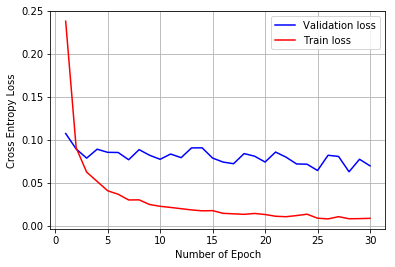

In [0]:
TRAIN_LOSS = FINAL_MODEL.history['loss']
VAL_LOSS = FINAL_MODEL.history['val_loss']
X = list(range(1,31))
plt.plot(X,VAL_LOSS,'b',label="Validation loss")
plt.plot(X,TRAIN_LOSS,'r',label='Train loss')
plt.legend()
plt.grid()
plt.xlabel("Number of Epoch")
plt.ylabel('Cross Entropy Loss')



In [0]:
MODEL_WT = MODEL.get_weights()
for i in range(0,len(MODEL_WT)):
    print(MODEL_WT[i].shape)

(784, 400)
(400,)
(400,)
(400,)
(400,)
(400,)
(400, 300)
(300,)
(300,)
(300,)
(300,)
(300,)
(300, 200)
(200,)
(200,)
(200,)
(200,)
(200,)
(200, 100)
(100,)
(100,)
(100,)
(100,)
(100,)
(100, 50)
(50,)
(50,)
(50,)
(50,)
(50,)
(50, 10)
(10,)


Text(0.5, 0, 'OUTPUT_WT ')

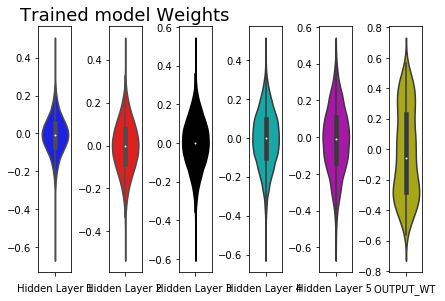

In [0]:


H1_WT = MODEL_WT[0].flatten().reshape(-1,1)
H2_WT = MODEL_WT[6].flatten().reshape(-1,1)
H3_WT = MODEL_WT[12].flatten().reshape(-1,1)
H4_WT = MODEL_WT[18].flatten().reshape(-1,1)
H5_WT = MODEL_WT[24].flatten().reshape(-1,1)
OUT_WT= MODEL_WT[30].flatten().reshape(-1,1)


fig,(axes1,axes2,axes3,axes4,axes5,axes6) = plt.subplots(nrows=1, ncols=6)
fig.tight_layout()

plt.subplot(1, 6, 1)
VIOLIN = SNS.violinplot(y=H1_WT,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights",size=18)
VIOLIN = SNS.violinplot(y=H2_WT, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
VIOLIN = SNS.violinplot(y=H3_WT, color='k')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
VIOLIN = SNS.violinplot(y=H4_WT, color='c')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
VIOLIN = SNS.violinplot(y=H5_WT, color='m')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
VIOLIN = SNS.violinplot(y=OUT_WT, color='y')
plt.xlabel('OUTPUT_WT ')

# 5 Hidden Layer MLP having no Dropout and Batch Normalization

# Neuron in Hidden Layers = [400-300-200-100-50]

In [0]:


MODEL = Sequential()
MODEL.add(Dense(400,activation='relu',input_shape=(X_TRAIN.shape[1],),kernel_initializer=he_normal(seed=None)))
MODEL.add(BatchNormalization())
MODEL.add(Dropout(0.5))

MODEL.add(Dense(300,activation='relu',kernel_initializer=he_normal(seed=None)))
MODEL.add(BatchNormalization())
MODEL.add(Dropout(0.5))

MODEL.add(Dense(200,activation='relu',kernel_initializer=he_normal(seed=None)))
MODEL.add(BatchNormalization())
MODEL.add(Dropout(0.5))

MODEL.add(Dense(100,activation='relu',kernel_initializer=he_normal(seed=None)))
MODEL.add(BatchNormalization())
MODEL.add(Dropout(0.5))

MODEL.add(Dense(50,activation='relu',kernel_initializer=he_normal(seed=None)))
MODEL.add(BatchNormalization())
MODEL.add(Dropout(0.5))

MODEL.add(Dense(10,activation='softmax'))
print(MODEL.summary())

MODEL.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
FINAL_MODEL = MODEL.fit(X_TRAIN,Y_TRAIN,batch_size=128,epochs=30,verbose=1,validation_data=(X_TEST,Y_TEST))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_138 (Dense)            (None, 400)               314000    
_________________________________________________________________
batch_normalization_59 (Batc (None, 400)               1600      
_________________________________________________________________
dropout_37 (Dropout)         (None, 400)               0         
_________________________________________________________________
dense_139 (Dense)            (None, 300)               120300    
_________________________________________________________________
batch_normalization_60 (Batc (None, 300)               1200      
_________________________________________________________________
dropout_38 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_140 (Dense)            (None, 200)               60200     
__________

In [0]:

score = MODEL.evaluate(X_TEST, Y_TEST, verbose=0) 
TEST_ACCURACY.append(score[1])
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.07330910813587252
Test accuracy: 0.9838


Text(0, 0.5, 'Cross Entropy Loss')

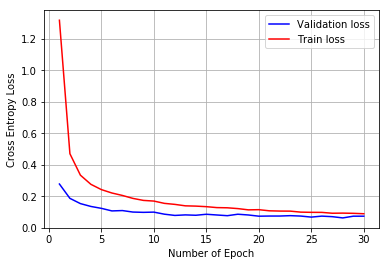

In [0]:
TRAIN_LOSS = FINAL_MODEL.history['loss']
VAL_LOSS = FINAL_MODEL.history['val_loss']
X = list(range(1,31))
plt.plot(X,VAL_LOSS,'b',label="Validation loss")
plt.plot(X,TRAIN_LOSS,'r',label='Train loss')
plt.legend()
plt.grid()
plt.xlabel("Number of Epoch")
plt.ylabel('Cross Entropy Loss')



In [0]:
MODEL_WT = MODEL.get_weights()
for i in range(0,len(MODEL_WT)):
    print(MODEL_WT[i].shape)

(784, 400)
(400,)
(400,)
(400,)
(400,)
(400,)
(400, 300)
(300,)
(300,)
(300,)
(300,)
(300,)
(300, 200)
(200,)
(200,)
(200,)
(200,)
(200,)
(200, 100)
(100,)
(100,)
(100,)
(100,)
(100,)
(100, 50)
(50,)
(50,)
(50,)
(50,)
(50,)
(50, 10)
(10,)


Text(0.5, 0, 'OUTPUT_WT ')

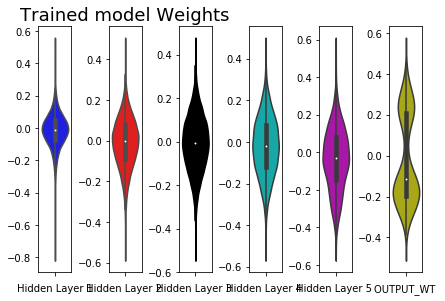

In [0]:


H1_WT = MODEL_WT[0].flatten().reshape(-1,1)
H2_WT = MODEL_WT[6].flatten().reshape(-1,1)
H3_WT = MODEL_WT[12].flatten().reshape(-1,1)
H4_WT = MODEL_WT[18].flatten().reshape(-1,1)
H5_WT = MODEL_WT[24].flatten().reshape(-1,1)
OUT_WT= MODEL_WT[30].flatten().reshape(-1,1)


fig,(axes1,axes2,axes3,axes4,axes5,axes6) = plt.subplots(nrows=1, ncols=6)
fig.tight_layout()

plt.subplot(1, 6, 1)
VIOLIN = SNS.violinplot(y=H1_WT,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights",size=18)
VIOLIN = SNS.violinplot(y=H2_WT, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
VIOLIN = SNS.violinplot(y=H3_WT, color='k')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
VIOLIN = SNS.violinplot(y=H4_WT, color='c')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
VIOLIN = SNS.violinplot(y=H5_WT, color='m')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
VIOLIN = SNS.violinplot(y=OUT_WT, color='y')
plt.xlabel('OUTPUT_WT ')

In [0]:
from prettytable import PrettyTable

In [2]:
X=PrettyTable()
print(" "*40+"CONCLUSION")
print("="*100)
X.field_names = ["Model","Number Of Hidden Layers","Neurons in Layer","Test Loss"]
X.add_row(["MLP+RELU+ADAM","2","[200-100]",0.095])
X.add_row(["MLP+RELU+ADAM+Batch Normalization ","2","[200-100]",0.0961])  
X.add_row(["MLP+RELU+ADAM+Batch Normalization+Dropout","2","[200-100]",0.065])  

X.add_row(["MLP+RELU+ADAM","3","[200-100-50]",0.0931])
X.add_row(["MLP+RELU+ADAM+Batch Normalization ","3","[200-100-50]",0.854])  
X.add_row(["MLP+RELU+ADAM+Batch Normalization+Dropout","3","[200-100-50]",0.0737])  

X.add_row(["MLP+RELU+ADAM","5","[400-300-200-100-50]",0.0945])
X.add_row(["MLP+RELU+ADAM+Batch Normalization ","5","[400-300-200-100-50]",0.0698])  
X.add_row(["MLP+RELU+ADAM+Batch Normalization+Dropout","5","[400-300-200-100-50]",0.0733])  
print(X)

                                        CONCLUSION
+-------------------------------------------+-------------------------+----------------------+-----------+
|                   Model                   | Number Of Hidden Layers |   Neurons in Layer   | Test Loss |
+-------------------------------------------+-------------------------+----------------------+-----------+
|               MLP+RELU+ADAM               |            2            |      [200-100]       |   0.095   |
|     MLP+RELU+ADAM+Batch Normalization     |            2            |      [200-100]       |   0.0961  |
| MLP+RELU+ADAM+Batch Normalization+Dropout |            2            |      [200-100]       |   0.065   |
|               MLP+RELU+ADAM               |            3            |     [200-100-50]     |   0.0931  |
|     MLP+RELU+ADAM+Batch Normalization     |            3            |     [200-100-50]     |   0.854   |
| MLP+RELU+ADAM+Batch Normalization+Dropout |            3            |     [200-100-50]     

# Updated ....Part:

# Model:1

Activation Function: sigmoid

Optimizer: SGD

Wt initializer : Random uniform

MLP Architecture: [240-120-60]

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import RandomNormal

In [0]:
M= Sequential()
M.add(Dense(240,activation='sigmoid',input_shape=(X_TRAIN.shape[1],),kernel_initializer=RandomNormal(mean=0,stddev=1,seed=None)))
M.add(Dense(120,activation='sigmoid',kernel_initializer=RandomNormal(mean=0,stddev=1,seed=None)))
M.add(Dense(60,activation='sigmoid',kernel_initializer=RandomNormal(mean=0,stddev=1,seed=None)))
M.add(Dense(10,activation='softmax'))

In [0]:
def NN(MODEL3,OPTIMIZER):
  TEST_ACCURACY=[]
  MODEL3.compile(optimizer=OPTIMIZER,loss='categorical_crossentropy',metrics=['accuracy'])
  History = MODEL3.fit(X_TRAIN,Y_TRAIN,batch_size=128,epochs=30,verbose=1,validation_data=(X_TEST,Y_TEST))
  score = MODEL3.evaluate(X_TEST, Y_TEST, verbose=0) 
  TEST_ACCURACY.append(score[1])
  print('Test score:', score[0]) 
  print('Test accuracy:', score[1])
  return History

def PLOT(History):
  TRAIN_LOSS = History.history['loss']
  VAL_LOSS = History.history['val_loss']
  X = list(range(1,31))
  plt.plot(X,VAL_LOSS,'b',label="Validation loss")
  plt.plot(X,TRAIN_LOSS,'r',label='Train loss')
  plt.legend()
  plt.grid()
  plt.xlabel("Number of Epoch")
  plt.ylabel('Cross Entropy Loss')


  
  

In [0]:
H=NN(M,'SGD')

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 10s 158us/step - loss: 2.2261 - acc: 0.1883 - val_loss: 2.1329 - val_acc: 0.2452
Epoch 2/30
60000/60000 [==============================] - 4s 65us/step - loss: 2.0760 - acc: 0.2892 - val_loss: 1.9912 - val_acc: 0.3457
Epoch 3/30
60000/60000 [==============================] - 4s 65us/step - loss: 1.9363 - acc: 0.3836 - val_loss: 1.8475 - val_acc: 0.4262
Epoch 4/30
60000/60000 [==============================] - 4s 65us/step - loss: 1.7967 - acc: 0.4508 - val_loss: 1.7086 - val_acc: 0.4794
Epoch 5/30
60000/60000 [==============================] - 4s 66us/step - loss: 1.6662 - acc: 0.5005 - val_loss: 1.5844 - val_acc: 0.5226
Epoch 6/30
60000/60000 [==============================] - 4s 66us/step - loss: 1.5518 - acc: 0.5360 - val_loss: 1.4787 - val_acc: 0.5560
Epoch 7/30
60000/60000 [==============================] - 4s 66us/step - loss: 1.4542 - acc: 0.5670 - val_loss: 1.3885 - val_a

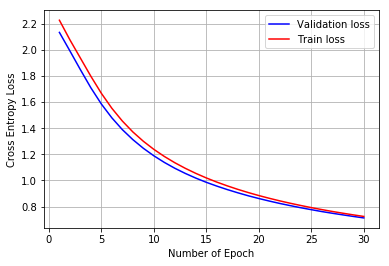

In [0]:
PLOT(H)

In [0]:
MODEL_WT = M.get_weights()
for i in range(0,len(MODEL_WT)):
    print(MODEL_WT[i].shape)

(784, 240)
(240,)
(240, 120)
(120,)
(120, 60)
(60,)
(60, 10)
(10,)


Text(0.5, 0, 'OUTPUT_WT ')

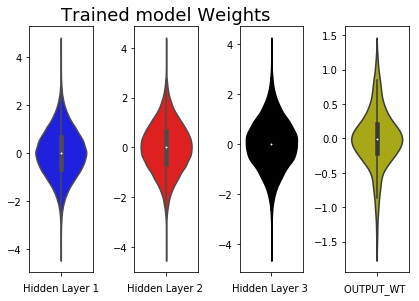

In [0]:


H1_WT = MODEL_WT[0].flatten().reshape(-1,1)
H2_WT = MODEL_WT[2].flatten().reshape(-1,1)
H3_WT = MODEL_WT[4].flatten().reshape(-1,1)
OUT_WT= MODEL_WT[6].flatten().reshape(-1,1)


fig,(axes1,axes2,axes3,axes4) = plt.subplots(nrows=1, ncols=4)
fig.tight_layout()

plt.subplot(1, 4, 1)
VIOLIN = SNS.violinplot(y=H1_WT,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights",size=18)
VIOLIN = SNS.violinplot(y=H2_WT, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
VIOLIN = SNS.violinplot(y=H3_WT, color='k')
plt.xlabel('Hidden Layer 3 ')


plt.subplot(1, 4, 4)
VIOLIN = SNS.violinplot(y=OUT_WT, color='y')
plt.xlabel('OUTPUT_WT ')

# MODEL:2

Activation Function: Tanh

Optimizer: Adagrad

Wt initializer : Random Normal

MLP Architecture: [340-150-20]

In [0]:
from keras.initializers import RandomUniform
M= Sequential()
M.add(Dense(340,activation='tanh',input_shape=(X_TRAIN.shape[1],),kernel_initializer=RandomUniform(minval=-0.05, maxval=0.05, seed=None)))
M.add(Dense(150,activation='tanh',kernel_initializer=RandomUniform(minval=-0.05, maxval=0.05, seed=None)))
M.add(Dense(20,activation='tanh',kernel_initializer=RandomUniform(minval=-0.05, maxval=0.05, seed=None)))
M.add(Dense(10,activation='softmax'))

In [0]:
H=NN(M,'Adagrad')

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 11s 181us/step - loss: 0.3647 - acc: 0.9027 - val_loss: 0.2133 - val_acc: 0.9410
Epoch 2/30
60000/60000 [==============================] - 5s 87us/step - loss: 0.1820 - acc: 0.9498 - val_loss: 0.1610 - val_acc: 0.9539
Epoch 3/30
60000/60000 [==============================] - 5s 87us/step - loss: 0.1387 - acc: 0.9612 - val_loss: 0.1367 - val_acc: 0.9595
Epoch 4/30
60000/60000 [==============================] - 5s 85us/step - loss: 0.1133 - acc: 0.9691 - val_loss: 0.1208 - val_acc: 0.9648
Epoch 5/30
60000/60000 [==============================] - 5s 85us/step - loss: 0.0961 - acc: 0.9742 - val_loss: 0.1039 - val_acc: 0.9684
Epoch 6/30
60000/60000 [==============================] - 5s 86us/step - loss: 0.0828 - acc: 0.9778 - val_loss: 0.0974 - val_acc: 0.9711
Epoch 7/30
60000/60000 [==============================] - 5s 87us/step - loss: 0.0731 - acc: 0.9801 - val_loss: 0.0930 - val_a

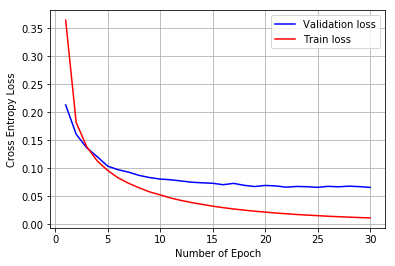

In [0]:
PLOT(H)

In [0]:
MODEL_WT = M.get_weights()
for i in range(0,len(MODEL_WT)):
    print(MODEL_WT[i].shape)

(784, 340)
(340,)
(340, 150)
(150,)
(150, 20)
(20,)
(20, 10)
(10,)


Text(0.5, 0, 'OUTPUT_WT ')

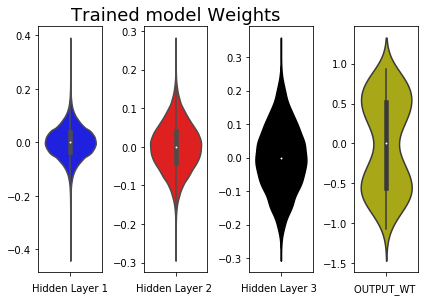

In [0]:


H1_WT = MODEL_WT[0].flatten().reshape(-1,1)
H2_WT = MODEL_WT[2].flatten().reshape(-1,1)
H3_WT = MODEL_WT[4].flatten().reshape(-1,1)
OUT_WT= MODEL_WT[6].flatten().reshape(-1,1)


fig,(axes1,axes2,axes3,axes4) = plt.subplots(nrows=1, ncols=4)
fig.tight_layout()

plt.subplot(1, 4, 1)
VIOLIN = SNS.violinplot(y=H1_WT,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights",size=18)
VIOLIN = SNS.violinplot(y=H2_WT, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
VIOLIN = SNS.violinplot(y=H3_WT, color='k')
plt.xlabel('Hidden Layer 3 ')


plt.subplot(1, 4, 4)
VIOLIN = SNS.violinplot(y=OUT_WT, color='y')
plt.xlabel('OUTPUT_WT ')

# MODEL:3

Activation Function: hard_sigmoid

Optimizer: Adadelta

Wt initializer : glorot_normal

MLP Architecture: [420-300-200-120-20]

In [0]:
from keras.initializers import glorot_normal
M= Sequential()
M.add(Dense(420,activation='hard_sigmoid',input_shape=(X_TRAIN.shape[1],),kernel_initializer=glorot_normal(seed=None)))
M.add(Dense(300,activation='hard_sigmoid',kernel_initializer=glorot_normal(seed=None)))
M.add(Dense(200,activation='hard_sigmoid',kernel_initializer=glorot_normal(seed=None)))
M.add(Dense(120,activation='hard_sigmoid',kernel_initializer=glorot_normal(seed=None)))
M.add(Dense(20,activation='hard_sigmoid',kernel_initializer=glorot_normal(seed=None)))

M.add(Dense(10,activation='softmax'))

In [0]:
H=NN(M,'Adadelta')

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 16s 267us/step - loss: 2.3042 - acc: 0.1098 - val_loss: 2.3016 - val_acc: 0.1032
Epoch 2/30
60000/60000 [==============================] - 10s 169us/step - loss: 2.3025 - acc: 0.1095 - val_loss: 2.3015 - val_acc: 0.1010
Epoch 3/30
60000/60000 [==============================] - 10s 171us/step - loss: 2.2970 - acc: 0.1226 - val_loss: 2.2717 - val_acc: 0.1884
Epoch 4/30
60000/60000 [==============================] - 10s 170us/step - loss: 1.8693 - acc: 0.2952 - val_loss: 1.7211 - val_acc: 0.3263
Epoch 5/30
60000/60000 [==============================] - 10s 171us/step - loss: 1.5454 - acc: 0.4324 - val_loss: 1.2215 - val_acc: 0.5707
Epoch 6/30
60000/60000 [==============================] - 10s 171us/step - loss: 1.0441 - acc: 0.6608 - val_loss: 0.8775 - val_acc: 0.7375
Epoch 7/30
60000/60000 [==============================] - 10s 170us/step - loss: 0.7662 - acc: 0.7772 - val_loss: 0.

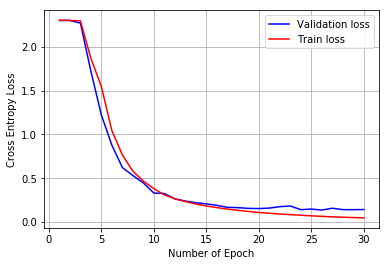

In [0]:
PLOT(H)

In [0]:
MODEL_WT = M.get_weights()
for i in range(0,len(MODEL_WT)):
    print(MODEL_WT[i].shape)

(784, 420)
(420,)
(420, 300)
(300,)
(300, 200)
(200,)
(200, 120)
(120,)
(120, 20)
(20,)
(20, 10)
(10,)


Text(0.5, 0, 'OUTPUT_WT ')

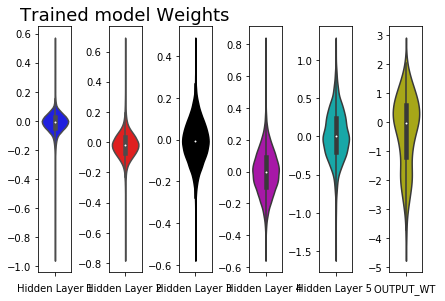

In [0]:


H1_WT = MODEL_WT[0].flatten().reshape(-1,1)
H2_WT = MODEL_WT[2].flatten().reshape(-1,1)
H3_WT = MODEL_WT[4].flatten().reshape(-1,1)
H4_WT = MODEL_WT[6].flatten().reshape(-1,1)
H5_WT = MODEL_WT[8].flatten().reshape(-1,1)
OUT_WT= MODEL_WT[10].flatten().reshape(-1,1)


fig,(axes1,axes2,axes3,axes4,axes5,axes6) = plt.subplots(nrows=1, ncols=6)
fig.tight_layout()

plt.subplot(1, 6, 1)
VIOLIN = SNS.violinplot(y=H1_WT,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights",size=18)
VIOLIN = SNS.violinplot(y=H2_WT, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
VIOLIN = SNS.violinplot(y=H3_WT, color='k')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
VIOLIN = SNS.violinplot(y=H4_WT, color='m')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
VIOLIN = SNS.violinplot(y=H5_WT, color='c')
plt.xlabel('Hidden Layer 5 ')


plt.subplot(1, 6, 6)
VIOLIN = SNS.violinplot(y=OUT_WT, color='y')
plt.xlabel('OUTPUT_WT ')

# MODEL:4

Activation Function: relu

Optimizer: Adamax

Wt initializer : glorot_uniform

MLP Architecture: [340-240-140-100-50]

Dropout= 0.3

BatchNormalization

In [0]:
from keras.initializers import glorot_uniform
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
M= Sequential()
M.add(Dense(340,activation='relu',input_shape=(X_TRAIN.shape[1],),kernel_initializer=glorot_uniform(seed=None)))
M.add(BatchNormalization())
M.add(Dropout(0.3))
M.add(Dense(240,activation='relu',kernel_initializer=glorot_uniform(seed=None)))
M.add(BatchNormalization())
M.add(Dropout(0.3))
M.add(Dense(140,activation='relu',kernel_initializer=glorot_uniform(seed=None)))
M.add(BatchNormalization())
M.add(Dropout(0.3))
M.add(Dense(100,activation='relu',kernel_initializer=glorot_uniform(seed=None)))
M.add(BatchNormalization())
M.add(Dropout(0.3))
M.add(Dense(50,activation='relu',kernel_initializer=glorot_uniform(seed=None)))
M.add(BatchNormalization())
M.add(Dropout(0.3))

M.add(Dense(10,activation='softmax'))

In [0]:
H=NN(M,'Adamax')

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 17s 292us/step - loss: 0.6684 - acc: 0.7974 - val_loss: 0.1879 - val_acc: 0.9445
Epoch 2/30
60000/60000 [==============================] - 10s 172us/step - loss: 0.2780 - acc: 0.9225 - val_loss: 0.1333 - val_acc: 0.9614
Epoch 3/30
60000/60000 [==============================] - 10s 173us/step - loss: 0.2061 - acc: 0.9436 - val_loss: 0.1174 - val_acc: 0.9667
Epoch 4/30
60000/60000 [==============================] - 10s 174us/step - loss: 0.1705 - acc: 0.9533 - val_loss: 0.0962 - val_acc: 0.9733
Epoch 5/30
60000/60000 [==============================] - 10s 171us/step - loss: 0.1455 - acc: 0.9607 - val_loss: 0.0943 - val_acc: 0.9737
Epoch 6/30
60000/60000 [==============================] - 10s 174us/step - loss: 0.1323 - acc: 0.9636 - val_loss: 0.0866 - val_acc: 0.9763
Epoch 7/30
60000/60000 [==============================] - 10s 174us/step - loss: 0.1169 - acc: 0.9679 - val_loss: 0.

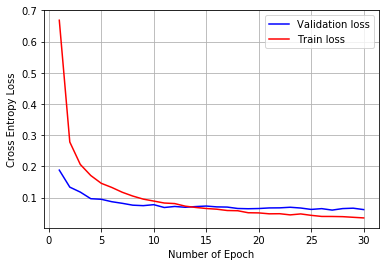

In [0]:
PLOT(H)

In [0]:
MODEL_WT = M.get_weights()
for i in range(0,len(MODEL_WT)):
    print(MODEL_WT[i].shape)

(784, 340)
(340,)
(340,)
(340,)
(340,)
(340,)
(340, 240)
(240,)
(240,)
(240,)
(240,)
(240,)
(240, 140)
(140,)
(140,)
(140,)
(140,)
(140,)
(140, 100)
(100,)
(100,)
(100,)
(100,)
(100,)
(100, 50)
(50,)
(50,)
(50,)
(50,)
(50,)
(50, 10)
(10,)


Text(0.5, 0, 'OUTPUT_WT ')

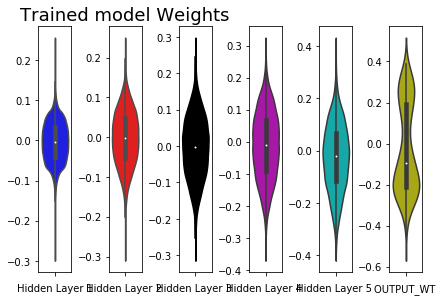

In [0]:


H1_WT = MODEL_WT[0].flatten().reshape(-1,1)
H2_WT = MODEL_WT[6].flatten().reshape(-1,1)
H3_WT = MODEL_WT[12].flatten().reshape(-1,1)
H4_WT = MODEL_WT[18].flatten().reshape(-1,1)
H5_WT = MODEL_WT[24].flatten().reshape(-1,1)
OUT_WT= MODEL_WT[30].flatten().reshape(-1,1)


fig,(axes1,axes2,axes3,axes4,axes5,axes6) = plt.subplots(nrows=1, ncols=6)
fig.tight_layout()

plt.subplot(1, 6, 1)
VIOLIN = SNS.violinplot(y=H1_WT,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights",size=18)
VIOLIN = SNS.violinplot(y=H2_WT, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
VIOLIN = SNS.violinplot(y=H3_WT, color='k')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
VIOLIN = SNS.violinplot(y=H4_WT, color='m')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
VIOLIN = SNS.violinplot(y=H5_WT, color='c')
plt.xlabel('Hidden Layer 5 ')


plt.subplot(1, 6, 6)
VIOLIN = SNS.violinplot(y=OUT_WT, color='y')
plt.xlabel('OUTPUT_WT ')

# Model :5

Activation: Relu

Optimizer: Adam

Wt initializer: All ones

Dropout rate = 0.2

MLP layers = [350-250-100]

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import Ones
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
M= Sequential()
M.add(Dense(350,activation='relu',input_shape=(X_TRAIN.shape[1],),kernel_initializer=Ones()))
M.add(Dropout(0.2))
M.add(Dense(250,activation='relu',kernel_initializer=Ones()))
M.add(Dropout(0.2))
M.add(Dense(150,activation='relu',kernel_initializer=Ones()))
M.add(Dropout(0.2))


M.add(Dense(10,activation='softmax'))

In [0]:
H = NN(M,'adam')

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 14s 240us/step - loss: 14.5332 - acc: 0.0983 - val_loss: 14.5353 - val_acc: 0.0982
Epoch 2/30
60000/60000 [==============================] - 8s 136us/step - loss: 14.5503 - acc: 0.0973 - val_loss: 14.5353 - val_acc: 0.0982
Epoch 3/30
60000/60000 [==============================] - 8s 134us/step - loss: 14.5396 - acc: 0.0979 - val_loss: 14.5353 - val_acc: 0.0982
Epoch 4/30
60000/60000 [==============================] - 8s 136us/step - loss: 14.5589 - acc: 0.0967 - val_loss: 14.5353 - val_acc: 0.0982
Epoch 5/30
60000/60000 [==============================] - 8s 136us/step - loss: 14.5563 - acc: 0.0969 - val_loss: 14.5353 - val_acc: 0.0982
Epoch 6/30
60000/60000 [==============================] - 8s 135us/step - loss: 14.5541 - acc: 0.0970 - val_loss: 14.5353 - val_acc: 0.0982
Epoch 7/30
60000/60000 [==============================] - 8s 134us/step - loss: 14.5458 - acc: 0.0975 - val_l

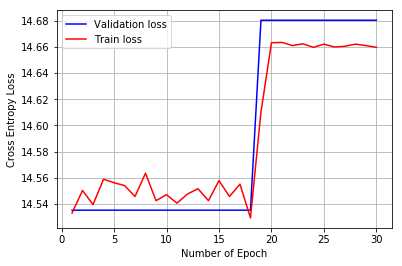

In [0]:
PLOT(H)

In [0]:
MODEL_WT = M.get_weights()
for i in range(0,len(MODEL_WT)):
    print(MODEL_WT[i].shape)

(784, 350)
(350,)
(350, 250)
(250,)
(250, 150)
(150,)
(150, 10)
(10,)


Text(0.5, 0, 'OUTPUT_WT ')

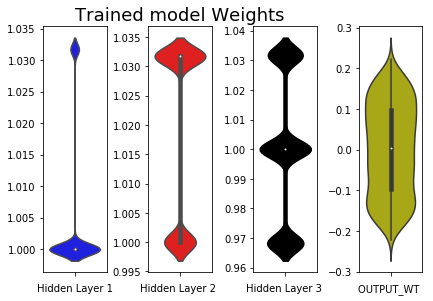

In [0]:


H1_WT = MODEL_WT[0].flatten().reshape(-1,1)
H2_WT = MODEL_WT[2].flatten().reshape(-1,1)
H3_WT = MODEL_WT[4].flatten().reshape(-1,1)
OUT_WT = MODEL_WT[6].flatten().reshape(-1,1)


fig,(axes1,axes2,axes3,axes4) = plt.subplots(nrows=1, ncols=4)
fig.tight_layout()

plt.subplot(1, 4, 1)
VIOLIN = SNS.violinplot(y=H1_WT,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights",size=18)
VIOLIN = SNS.violinplot(y=H2_WT, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
VIOLIN = SNS.violinplot(y=H3_WT, color='k')
plt.xlabel('Hidden Layer 3 ')



plt.subplot(1, 4, 4)
VIOLIN = SNS.violinplot(y=OUT_WT, color='y')
plt.xlabel('OUTPUT_WT ')

# MODEL 5.1

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import Ones
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
M= Sequential()
M.add(Dense(350,activation='relu',input_shape=(X_TRAIN.shape[1],),kernel_initializer=Ones()))
M.add(BatchNormalization())
M.add(Dropout(0.2))
M.add(Dense(250,activation='relu',kernel_initializer=Ones()))
M.add(BatchNormalization())
M.add(Dropout(0.2))
M.add(Dense(150,activation='relu',kernel_initializer=Ones()))
M.add(BatchNormalization())
M.add(Dropout(0.2))


M.add(Dense(10,activation='softmax'))



In [0]:
H = NN(M,'adam')


W0828 10:54:26.671952 140462218803072 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0828 10:54:26.706413 140462218803072 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0828 10:54:26.819462 140462218803072 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 11s 176us/step - loss: 2.3187 - acc: 0.1555 - val_loss: 2.1514 - val_acc: 0.1941
Epoch 2/30
60000/60000 [==============================] - 9s 145us/step - loss: 2.1470 - acc: 0.1900 - val_loss: 1.9909 - val_acc: 0.2050
Epoch 3/30
60000/60000 [==============================] - 9s 145us/step - loss: 1.9447 - acc: 0.2326 - val_loss: 1.8374 - val_acc: 0.2541
Epoch 4/30
60000/60000 [==============================] - 9s 145us/step - loss: 1.8182 - acc: 0.2568 - val_loss: 1.7403 - val_acc: 0.2702
Epoch 5/30
60000/60000 [==============================] - 9s 145us/step - loss: 1.7240 - acc: 0.2903 - val_loss: 1.6723 - val_acc: 0.3270
Epoch 6/30
60000/60000 [==============================] - 9s 145us/step - loss: 1.6499 - acc: 0.3308 - val_loss: 1.5777 - val_acc: 0.4039
Epoch 7/30
60000/60000 [==============================] - 9s 145us/step - loss: 1.5871 - acc: 0.3769 - val_loss: 1.5059 -

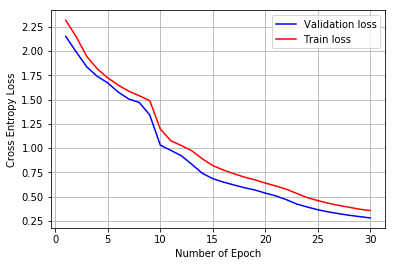

In [0]:
PLOT(H)

In [0]:
MODEL_WT = M.get_weights()
for i in range(0,len(MODEL_WT)):
    print(MODEL_WT[i].shape)

(784, 350)
(350,)
(350,)
(350,)
(350,)
(350,)
(350, 250)
(250,)
(250,)
(250,)
(250,)
(250,)
(250, 150)
(150,)
(150,)
(150,)
(150,)
(150,)
(150, 10)
(10,)


Text(0.5, 0, 'OUTPUT_WT ')

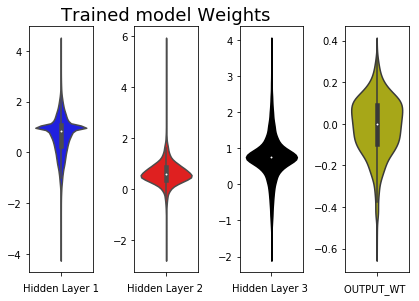

In [0]:
import seaborn as SNS
H1_WT = MODEL_WT[0].flatten().reshape(-1,1)
H2_WT = MODEL_WT[6].flatten().reshape(-1,1)
H3_WT = MODEL_WT[12].flatten().reshape(-1,1)
OUT_WT = MODEL_WT[18].flatten().reshape(-1,1)


fig,(axes1,axes2,axes3,axes4) = plt.subplots(nrows=1, ncols=4)
fig.tight_layout()

plt.subplot(1, 4, 1)
VIOLIN = SNS.violinplot(y=H1_WT,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights",size=18)
VIOLIN = SNS.violinplot(y=H2_WT, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
VIOLIN = SNS.violinplot(y=H3_WT, color='k')
plt.xlabel('Hidden Layer 3 ')



plt.subplot(1, 4, 4)
VIOLIN = SNS.violinplot(y=OUT_WT, color='y')
plt.xlabel('OUTPUT_WT ')

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import Ones
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
M= Sequential()
M.add(Dense(350,activation='relu',input_shape=(X_TRAIN.shape[1],),kernel_initializer=Ones()))
M.add(BatchNormalization())

M.add(Dense(250,activation='relu',kernel_initializer=Ones()))
M.add(BatchNormalization())

M.add(Dense(150,activation='relu',kernel_initializer=Ones()))
M.add(BatchNormalization())



M.add(Dense(10,activation='softmax'))



In [0]:
H=NN(M,'adam')

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 10s 168us/step - loss: 2.1484 - acc: 0.1942 - val_loss: 2.1150 - val_acc: 0.1730
Epoch 2/30
60000/60000 [==============================] - 9s 144us/step - loss: 1.9294 - acc: 0.2551 - val_loss: 1.8593 - val_acc: 0.2725
Epoch 3/30
60000/60000 [==============================] - 9s 143us/step - loss: 1.8147 - acc: 0.2835 - val_loss: 1.7578 - val_acc: 0.2879
Epoch 4/30
60000/60000 [==============================] - 9s 145us/step - loss: 1.7249 - acc: 0.3105 - val_loss: 1.6762 - val_acc: 0.3297
Epoch 5/30
60000/60000 [==============================] - 9s 145us/step - loss: 1.6743 - acc: 0.3305 - val_loss: 1.6466 - val_acc: 0.3454
Epoch 6/30
60000/60000 [==============================] - 9s 144us/step - loss: 1.6547 - acc: 0.3450 - val_loss: 2.6546 - val_acc: 0.1159
Epoch 7/30
60000/60000 [==============================] - 9s 144us/step - loss: 1.2749 - acc: 0.5346 - val_loss: 1.4604 -

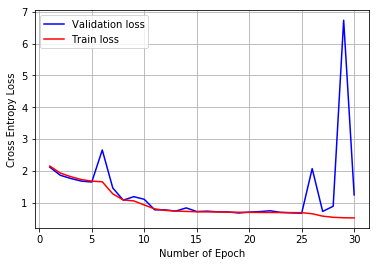

In [0]:
PLOT(H)

In [0]:
MODEL_WT = M.get_weights()
for i in range(0,len(MODEL_WT)):
    print(MODEL_WT[i].shape)

(784, 350)
(350,)
(350,)
(350,)
(350,)
(350,)
(350, 250)
(250,)
(250,)
(250,)
(250,)
(250,)
(250, 150)
(150,)
(150,)
(150,)
(150,)
(150,)
(150, 10)
(10,)


Text(0.5, 0, 'OUTPUT_WT ')

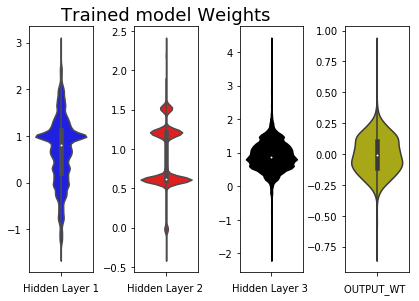

In [0]:
import seaborn as SNS
H1_WT = MODEL_WT[0].flatten().reshape(-1,1)
H2_WT = MODEL_WT[6].flatten().reshape(-1,1)
H3_WT = MODEL_WT[12].flatten().reshape(-1,1)
OUT_WT = MODEL_WT[18].flatten().reshape(-1,1)


fig,(axes1,axes2,axes3,axes4) = plt.subplots(nrows=1, ncols=4)
fig.tight_layout()

plt.subplot(1, 4, 1)
VIOLIN = SNS.violinplot(y=H1_WT,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights",size=18)
VIOLIN = SNS.violinplot(y=H2_WT, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
VIOLIN = SNS.violinplot(y=H3_WT, color='k')
plt.xlabel('Hidden Layer 3 ')



plt.subplot(1, 4, 4)
VIOLIN = SNS.violinplot(y=OUT_WT, color='y')
plt.xlabel('OUTPUT_WT ')

# Model :6

Activation: Relu

Optimizer: Adam

Wt initializer: All ones

Dropout rate = 0.4

MLP layers = [450-350-250-150-50]

BatchNormalization

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import Ones
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
M= Sequential()
M.add(Dense(450,activation='relu',input_shape=(X_TRAIN.shape[1],),kernel_initializer=Ones()))
M.add(BatchNormalization())
M.add(Dropout(0.4))
M.add(Dense(350,activation='relu',kernel_initializer=Ones()))
M.add(BatchNormalization())
M.add(Dropout(0.4))
M.add(Dense(250,activation='relu',kernel_initializer=Ones()))
M.add(BatchNormalization())
M.add(Dropout(0.4))
M.add(Dense(150,activation='relu',kernel_initializer=Ones()))
M.add(BatchNormalization())
M.add(Dropout(0.4))
M.add(Dense(50,activation='relu',kernel_initializer=Ones()))
M.add(BatchNormalization())
M.add(Dropout(0.4))

M.add(Dense(10,activation='softmax'))

In [0]:
H=NN(M,'adam')

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 23s 378us/step - loss: 2.4447 - acc: 0.1321 - val_loss: 2.2568 - val_acc: 0.1632
Epoch 2/30
60000/60000 [==============================] - 15s 249us/step - loss: 2.2809 - acc: 0.1513 - val_loss: 2.2004 - val_acc: 0.1787
Epoch 3/30
60000/60000 [==============================] - 15s 250us/step - loss: 2.1925 - acc: 0.1762 - val_loss: 2.1385 - val_acc: 0.2012
Epoch 4/30
60000/60000 [==============================] - 15s 250us/step - loss: 2.0951 - acc: 0.2074 - val_loss: 2.0226 - val_acc: 0.2097
Epoch 5/30
60000/60000 [==============================] - 15s 249us/step - loss: 1.9392 - acc: 0.2347 - val_loss: 1.8634 - val_acc: 0.2311
Epoch 6/30
60000/60000 [==============================] - 24s 404us/step - loss: 1.8124 - acc: 0.2504 - val_loss: 1.7479 - val_acc: 0.2686
Epoch 7/30
60000/60000 [==============================] - 15s 253us/step - loss: 1.7443 - acc: 0.2677 - val_loss: 1.

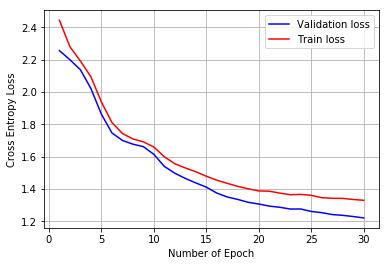

In [0]:
PLOT(H)

In [0]:
MODEL_WT = M.get_weights()
for i in range(0,len(MODEL_WT)):
    print(MODEL_WT[i].shape)

(784, 450)
(450,)
(450,)
(450,)
(450,)
(450,)
(450, 350)
(350,)
(350,)
(350,)
(350,)
(350,)
(350, 250)
(250,)
(250,)
(250,)
(250,)
(250,)
(250, 150)
(150,)
(150,)
(150,)
(150,)
(150,)
(150, 50)
(50,)
(50,)
(50,)
(50,)
(50,)
(50, 10)
(10,)


Text(0.5, 0, 'OUTPUT_WT ')

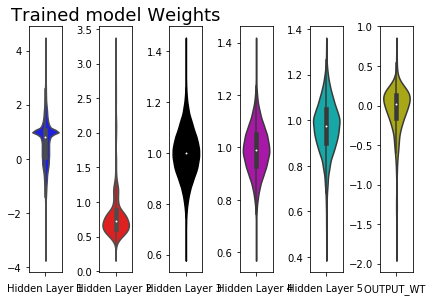

In [0]:


H1_WT = MODEL_WT[0].flatten().reshape(-1,1)
H2_WT = MODEL_WT[6].flatten().reshape(-1,1)
H3_WT = MODEL_WT[12].flatten().reshape(-1,1)
H4_WT = MODEL_WT[18].flatten().reshape(-1,1)
H5_WT = MODEL_WT[24].flatten().reshape(-1,1)
OUT_WT= MODEL_WT[30].flatten().reshape(-1,1)


fig,(axes1,axes2,axes3,axes4,axes5,axes6) = plt.subplots(nrows=1, ncols=6)
fig.tight_layout()

plt.subplot(1, 6, 1)
VIOLIN = SNS.violinplot(y=H1_WT,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights",size=18)
VIOLIN = SNS.violinplot(y=H2_WT, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
VIOLIN = SNS.violinplot(y=H3_WT, color='k')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
VIOLIN = SNS.violinplot(y=H4_WT, color='m')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
VIOLIN = SNS.violinplot(y=H5_WT, color='c')
plt.xlabel('Hidden Layer 5 ')


plt.subplot(1, 6, 6)
VIOLIN = SNS.violinplot(y=OUT_WT, color='y')
plt.xlabel('OUTPUT_WT ')

# Model :7

Activation: SoftPlus

Optimizer: Adadelta

Wt initializer: All ones

Dropout rate = 0.5

MLP layers = [350-250-100]

BatchNormalization 

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import Ones
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
M= Sequential()
M.add(Dense(260,activation='softplus',input_shape=(X_TRAIN.shape[1],),kernel_initializer=Ones()))
M.add(BatchNormalization())
M.add(Dropout(0.5))
M.add(Dense(140,activation='softplus',kernel_initializer=Ones()))
M.add(BatchNormalization())
M.add(Dropout(0.5))
M.add(Dense(40,activation='softplus',kernel_initializer=Ones()))
M.add(BatchNormalization())
M.add(Dropout(0.5))


M.add(Dense(10,activation='softmax'))

In [0]:
H = NN(M,'Adadelta')

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 15s 252us/step - loss: 2.4643 - acc: 0.1397 - val_loss: 2.2264 - val_acc: 0.1720
Epoch 2/30
60000/60000 [==============================] - 9s 151us/step - loss: 2.2659 - acc: 0.1589 - val_loss: 2.2057 - val_acc: 0.1782
Epoch 3/30
60000/60000 [==============================] - 7s 122us/step - loss: 2.2114 - acc: 0.1761 - val_loss: 2.1905 - val_acc: 0.1820
Epoch 4/30
60000/60000 [==============================] - 7s 123us/step - loss: 2.1901 - acc: 0.1852 - val_loss: 2.1765 - val_acc: 0.1910
Epoch 5/30
60000/60000 [==============================] - 8s 126us/step - loss: 2.1692 - acc: 0.1976 - val_loss: 2.1522 - val_acc: 0.2011
Epoch 6/30
60000/60000 [==============================] - 8s 128us/step - loss: 2.1500 - acc: 0.2054 - val_loss: 2.1383 - val_acc: 0.2053
Epoch 7/30
60000/60000 [==============================] - 8s 129us/step - loss: 2.1351 - acc: 0.2135 - val_loss: 2.1228 -

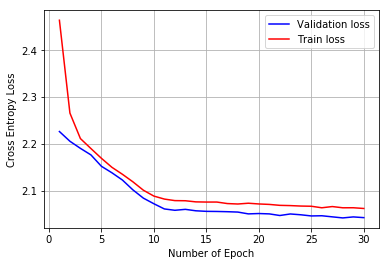

In [0]:
PLOT(H)

In [0]:
MODEL_WT = M.get_weights()
for i in range(0,len(MODEL_WT)):
    print(MODEL_WT[i].shape)

(784, 260)
(260,)
(260,)
(260,)
(260,)
(260,)
(260, 140)
(140,)
(140,)
(140,)
(140,)
(140,)
(140, 40)
(40,)
(40,)
(40,)
(40,)
(40,)
(40, 10)
(10,)


Text(0.5, 0, 'OUTPUT_WT ')

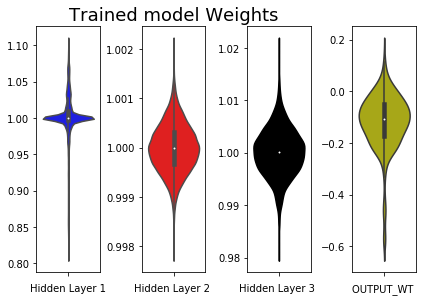

In [0]:


H1_WT = MODEL_WT[0].flatten().reshape(-1,1)
H2_WT = MODEL_WT[6].flatten().reshape(-1,1)
H3_WT = MODEL_WT[12].flatten().reshape(-1,1)
OUT_WT= MODEL_WT[18].flatten().reshape(-1,1)


fig,(axes1,axes2,axes3,axes4) = plt.subplots(nrows=1, ncols=4)
fig.tight_layout()

plt.subplot(1, 4, 1)
VIOLIN = SNS.violinplot(y=H1_WT,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights",size=18)
VIOLIN = SNS.violinplot(y=H2_WT, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
VIOLIN = SNS.violinplot(y=H3_WT, color='k')
plt.xlabel('Hidden Layer 3 ')



plt.subplot(1, 4, 4)
VIOLIN = SNS.violinplot(y=OUT_WT, color='y')
plt.xlabel('OUTPUT_WT ')

# Model :8

Activation: Softplus

Optimizer: Adadelta

Wt initializer: All ones



MLP layers = [260-140-40]

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import Ones
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
M= Sequential()
M.add(Dense(260,activation='softplus',input_shape=(X_TRAIN.shape[1],),kernel_initializer=Ones()))

M.add(Dense(140,activation='softplus',kernel_initializer=Ones()))

M.add(Dense(40,activation='softplus',kernel_initializer=Ones()))



M.add(Dense(10,activation='softmax'))

In [0]:
H = NN(M,'Adadelta')

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 14s 230us/step - loss: 14.5200 - acc: 0.0991 - val_loss: 14.4918 - val_acc: 0.1009
Epoch 2/30
60000/60000 [==============================] - 6s 93us/step - loss: 14.5200 - acc: 0.0991 - val_loss: 14.4918 - val_acc: 0.1009
Epoch 3/30
60000/60000 [==============================] - 6s 94us/step - loss: 14.5200 - acc: 0.0991 - val_loss: 14.4918 - val_acc: 0.1009
Epoch 4/30
60000/60000 [==============================] - 7s 111us/step - loss: 14.5200 - acc: 0.0992 - val_loss: 14.4918 - val_acc: 0.1009
Epoch 5/30
60000/60000 [==============================] - 6s 95us/step - loss: 14.5200 - acc: 0.0992 - val_loss: 14.4918 - val_acc: 0.1009
Epoch 6/30
60000/60000 [==============================] - 6s 100us/step - loss: 14.5200 - acc: 0.0991 - val_loss: 14.4918 - val_acc: 0.1009
Epoch 7/30
60000/60000 [==============================] - 6s 97us/step - loss: 14.5200 - acc: 0.0991 - val_loss:

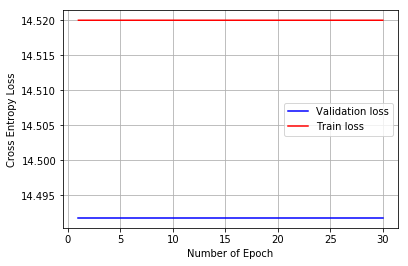

In [0]:
PLOT(H)

In [0]:
MODEL_WT = M.get_weights()
for i in range(0,len(MODEL_WT)):
    print(MODEL_WT[i].shape)

(784, 260)
(260,)
(260, 140)
(140,)
(140, 40)
(40,)
(40, 10)
(10,)


Text(0.5, 0, 'OUTPUT_WT ')

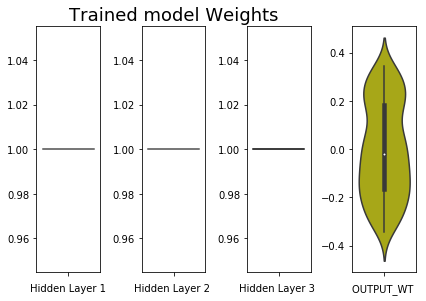

In [0]:


H1_WT = MODEL_WT[0].flatten().reshape(-1,1)
H2_WT = MODEL_WT[2].flatten().reshape(-1,1)
H3_WT = MODEL_WT[4].flatten().reshape(-1,1)
OUT_WT= MODEL_WT[6].flatten().reshape(-1,1)


fig,(axes1,axes2,axes3,axes4) = plt.subplots(nrows=1, ncols=4)
fig.tight_layout()

plt.subplot(1, 4, 1)
VIOLIN = SNS.violinplot(y=H1_WT,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights",size=18)
VIOLIN = SNS.violinplot(y=H2_WT, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
VIOLIN = SNS.violinplot(y=H3_WT, color='k')
plt.xlabel('Hidden Layer 3 ')


plt.subplot(1, 4, 4)
VIOLIN = SNS.violinplot(y=OUT_WT, color='y')
plt.xlabel('OUTPUT_WT ')

In [18]:
from prettytable import PrettyTable
X=PrettyTable()
print(" "*40+"CONCLUSION")
print("="*100)
X.field_names = ["Model","Number Of Hidden Layers","Neurons in Layer",'Dropout rate',"Test Loss"]
X.add_row(["Sigmoid-SGD-RandomUniform","3","[240-120-60]",'No Dropout',0.719])
X.add_row(["Tanh+Adagrad+RandomNormal","3","[340-150-20]",'No Dropout',0.064])  
X.add_row(["Hard Sigmoid+AdaDelta+Glorot Normal+Batch Normalization+Dropout","5","[420-300-200-120-20]",0.3,0.12])  

X.add_row(["Relu + Adamax +glorot Uniform +BN+Dropout","5","[340-240-140-100-50]",0.3,0.07])

X.add_row(["Relu+Adam+All Ones +Dropout","3","[350-250-100]",'0.2',14.54])
X.add_row(["Relu+Adam+All Ones +BN+DROPOUT","3","[350-250-100]",'0.2',0.28]) 
X.add_row(["Relu+Adam+All Ones +BN","3","[350-250-100]",'No',1.24]) 
X.add_row(["Relu+Adam+All Ones+Batch Normalization+Dropout","5","[450-350-250-150-50]",'0.4',1.22])  

X.add_row(["softPlus+Adadelta+All One+BN+Dropout","3","[260-140-40]",0.5,2.04])
X.add_row(["Softplus+Adadelta+AllOne ","3","[350-250-100]","No Dropout",14.46])   
print(X)

                                        CONCLUSION
+-----------------------------------------------------------------+-------------------------+----------------------+--------------+-----------+
|                              Model                              | Number Of Hidden Layers |   Neurons in Layer   | Dropout rate | Test Loss |
+-----------------------------------------------------------------+-------------------------+----------------------+--------------+-----------+
|                    Sigmoid-SGD-RandomUniform                    |            3            |     [240-120-60]     |  No Dropout  |   0.719   |
|                    Tanh+Adagrad+RandomNormal                    |            3            |     [340-150-20]     |  No Dropout  |   0.064   |
| Hard Sigmoid+AdaDelta+Glorot Normal+Batch Normalization+Dropout |            5            | [420-300-200-120-20] |     0.3      |    0.12   |
|            Relu + Adamax +glorot Uniform +BN+Dropout            |            5     



1.   In first 9 model I have use Relu as activation function ,adam as optimizer and intialize weight using HE_Normal,I have tried out different architecture with different layer and ploted Train loss/Validation loss vs epoch to check my model perfomance.


*   If Train loss is too high than validation loss we say that Model is Underfit.

*   If Train Loss is too low than validation loss then Model is Overfit.

*   What we want in Our Model is that both this loss should be low and approximatly close to each other.

2.  It is clearly seen from first preety table that doing Batch Normalization followed by  dropout of particular  droprate improve model perfomance , i.e Test loss is decreasing as we add do Batch Normalization and add dropout.

3.  I have also plotted Violin plot of every model to see weight distribution . Thumb rule is  that initial Weight should not be all zero or all large numbers this can create problem of vanishing or exploidig gradient.

4. One thing to be noted that if we want to extract those updated weight from our model we must pay special attention to number of neurons we are using in each layer and also take care that whether we are doing Batch Normalization and dropout.

Ex. 

    let say we have 3  hidden layer and we are not using any BN and dropout, if we extract weight using MODEL.get_weights() then we will be getting 8 vectors of shape depending on number of neurons we used.

    If  we have 3  hidden layer and if  use any BN and dropout, if we extract weight using MODEL.get_weights() then we will be getting 20 vectors of shape depending on number of neurons we used.
    
5.   In Next Eight Model(with differnet architecture)I have tried with different optimizer,activation function and used different weight intializer.

6.   Best Model in my case is giving Test Loss of 0.07 it has 5 hidden layers[340-240-140-100-50] Relu + Adamax +glorot Uniform +BN+Dropout.

7.What I observe is using BN+Dropout improve our model perfomance, I have also tried out model with only BN not dropout it is giving more test loss in comparison, Most of the time scenario will get worse if we only use dropout without doing BN it will give very high Test loss. 

8.When I use 3Hidden layer Model{Last Model}  [Softplus+Adadelta+AllOne(Weight Intializer) ] with no dropout and BN ,there is an no update of weight,weight distribution is constant and Training loss and Validation loss both are not changing as Number of epoch increases.

9. When I add BN and dropout in same model ,it perfomance improved significantly.





